In [125]:
%%javascript
require(["/static/components/codemirror/keymap/vim.js"]);

<IPython.core.display.Javascript object>

In [126]:
%%javascript
IPython.CodeCell.options_default.cm_config["keyMap"] = "vim";

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
spec_path = "/work/bits0/bi45/misc/arm-progs/spec/native-ref"
spec_csvs = { "401.bzip2", 
test_csv = spec_path + "/401.bzip2/input.source.out.csv"
test2_csv = spec_path + "/429.mcf/inp.out.csv"

In [103]:
def csv2df( filename, name ):
    print filename, name
    return pd.read_csv( filename, index_col=1, names=[name] ).T

In [26]:
df = csv2df( test_csv, "401.bzip2" )
df2 = csv2df( test2_csv, "429.mcf" )

In [27]:
df

,task-clock,context-switches,cpu-migrations,page-faults,cycles,stalled-cycles-frontend,stalled-cycles-backend,instructions,branches,branch-misses
401.bzip2,130290.524049,13938,10,4988,3.444245e+11,1.266453e+11,82495853868,4.131585e+11,67923235609,4715270226


In [30]:
df.append( df2 )

,task-clock,context-switches,cpu-migrations,page-faults,cycles,stalled-cycles-frontend,stalled-cycles-backend,instructions,branches,branch-misses
401.bzip2,130290.524049,13938,10,4988,3.444245e+11,1.266453e+11,8.249585e+10,4.131585e+11,67923235609,4715270226
429.mcf,318271.009625,33264,23,2875,8.403337e+11,6.289698e+11,4.460149e+11,3.227991e+11,67600639944,4041556691


In [43]:
def get_spec_df():
    # from path like /work/bits0/bi45/misc/arm-progs/spec/native-ref/471.omnetpp/omnetpp.log.csv
    # extract 471.omnetpp
    def get_app_name( path ):
        path = path[ :path.rfind("/") ]
        path = path[ path.rfind("/")+1: ]
        return path
    import glob
    csvs = glob.glob( "{}/*/*.csv".format( spec_path ) )
    bmarks = map( get_app_name, csvs )
    df = reduce( lambda d1,d2: d1.append(d2), map( lambda arg: csv2df(*arg), zip(csvs,bmarks)))
    return df

In [45]:
spec_df = get_spec_df()

In [46]:
spec_df

,task-clock,context-switches,cpu-migrations,page-faults,cycles,stalled-cycles-frontend,stalled-cycles-backend,instructions,branches,branch-misses
471.omnetpp,366384.266912,37169,6,47499,9.681932e+11,6.873220e+11,4.669316e+11,5.690757e+11,1.385242e+11,2417558724
429.mcf,318271.009625,33264,23,2875,8.403337e+11,6.289698e+11,4.460149e+11,3.227991e+11,6.760064e+10,4041556691
445.gobmk,79513.485901,8306,4,3411,2.098382e+11,7.419740e+10,5.740101e+10,2.320119e+11,4.444630e+10,3828063336
456.hmmer,170431.679678,17290,7,6753,4.506386e+11,9.340507e+10,2.184648e+10,9.044043e+11,4.287560e+10,129405441
473.astar,192386.576351,19502,4,115692,5.086713e+11,2.363855e+11,1.407689e+11,4.232241e+11,6.455227e+10,6113547466
458.sjeng,645938.163981,65336,2,2975,1.706981e+12,4.866568e+11,5.559125e+11,2.290347e+12,5.186529e+11,26479585332
464.h264ref,96502.974556,9826,4,9341,2.550847e+11,8.595461e+10,2.110182e+10,5.045497e+11,4.934120e+10,684009512
401.bzip2,130290.524049,13938,10,4988,3.444245e+11,1.266453e+11,8.249585e+10,4.131585e+11,6.792324e+10,4715270226
462.libquantum,532750.064310,53963,3,20003,1.405116e+12,5.607169e+11,3.803028e+11,2.290042e+12,3.998516e+11,7360524651


In [51]:
spec_df["ipc"] = spec_df["instructions"] / spec_df["cycles"]
spec_df["branch_per_inst"] = spec_df["branches"] / spec_df["instructions"]
spec_df["branch_miss_rate"] = spec_df["branch-misses"] / spec_df["branches"]
spec_df["pf_per_inst"] = spec_df["page-faults"] / spec_df["instructions"]


In [52]:
spec_df

,task-clock,context-switches,cpu-migrations,page-faults,cycles,stalled-cycles-frontend,stalled-cycles-backend,instructions,branches,branch-misses,ipc,branch_per_inst,branch_miss_rate,pf_per_inst
471.omnetpp,366384.266912,37169,6,47499,9.681932e+11,6.873220e+11,4.669316e+11,5.690757e+11,1.385242e+11,2417558724,0.587771,0.243420,0.017452,8.346693e-08
429.mcf,318271.009625,33264,23,2875,8.403337e+11,6.289698e+11,4.460149e+11,3.227991e+11,6.760064e+10,4041556691,0.384132,0.209420,0.059786,8.906468e-09
445.gobmk,79513.485901,8306,4,3411,2.098382e+11,7.419740e+10,5.740101e+10,2.320119e+11,4.444630e+10,3828063336,1.105671,0.191569,0.086128,1.470183e-08
456.hmmer,170431.679678,17290,7,6753,4.506386e+11,9.340507e+10,2.184648e+10,9.044043e+11,4.287560e+10,129405441,2.006940,0.047408,0.003018,7.466793e-09
473.astar,192386.576351,19502,4,115692,5.086713e+11,2.363855e+11,1.407689e+11,4.232241e+11,6.455227e+10,6113547466,0.832019,0.152525,0.094707,2.733587e-07
458.sjeng,645938.163981,65336,2,2975,1.706981e+12,4.866568e+11,5.559125e+11,2.290347e+12,5.186529e+11,26479585332,1.341753,0.226452,0.051055,1.298930e-09
464.h264ref,96502.974556,9826,4,9341,2.550847e+11,8.595461e+10,2.110182e+10,5.045497e+11,4.934120e+10,684009512,1.977970,0.097793,0.013863,1.851354e-08
401.bzip2,130290.524049,13938,10,4988,3.444245e+11,1.266453e+11,8.249585e+10,4.131585e+11,6.792324e+10,4715270226,1.199562,0.164400,0.069421,1.207285e-08
462.libquantum,532750.064310,53963,3,20003,1.405116e+12,5.607169e+11,3.803028e+11,2.290042e+12,3.998516e+11,7360524651,1.629789,0.174605,0.018408,8.734775e-09


In [53]:
py_path = "/work/bits0/bi45/misc/pyxcel/benchmarks/pypy-benchmarks-clean/perf_outs"

In [76]:
def get_py_df():
    def get_app_interp( path ):
        csv_name = path[ path.rfind("/")+1: ]
        return csv_name[ : csv_name.rfind("-")] , csv_name[ csv_name.rfind("-")+1:-4 ]
    import glob
    csvs = glob.glob( "{}/*.csv".format( py_path ) )
    bmarks = map( get_app_interp, csvs )
    #print bmarks
    df = reduce( lambda d1,d2: d1.append(d2), map( lambda arg: csv2df(*arg), zip(csvs,bmarks)))
    return df

In [147]:
py_df = get_py_df()

/work/bits0/bi45/misc/pyxcel/benchmarks/pypy-benchmarks-clean/perf_outs/rietveld-pypynojit.csv ('rietveld', 'pypynojit')
/work/bits0/bi45/misc/pyxcel/benchmarks/pypy-benchmarks-clean/perf_outs/fannkuch-pypy.csv ('fannkuch', 'pypy')
/work/bits0/bi45/misc/pyxcel/benchmarks/pypy-benchmarks-clean/perf_outs/meteor-contest-pypynojit.csv ('meteor-contest', 'pypynojit')
/work/bits0/bi45/misc/pyxcel/benchmarks/pypy-benchmarks-clean/perf_outs/chaos-cpython.csv ('chaos', 'cpython')
/work/bits0/bi45/misc/pyxcel/benchmarks/pypy-benchmarks-clean/perf_outs/bm_mdp-cpython.csv ('bm_mdp', 'cpython')
/work/bits0/bi45/misc/pyxcel/benchmarks/pypy-benchmarks-clean/perf_outs/spectral-norm-pypynojit.csv ('spectral-norm', 'pypynojit')
/work/bits0/bi45/misc/pyxcel/benchmarks/pypy-benchmarks-clean/perf_outs/twisted_pb-cpython.csv ('twisted_pb', 'cpython')
/work/bits0/bi45/misc/pyxcel/benchmarks/pypy-benchmarks-clean/perf_outs/sympy_sum-pypy.csv ('sympy_sum', 'pypy')
/work/bits0/bi45/misc/pyxcel/benchmarks/pypy-b

In [68]:
csv2df( py_path + "/ai-cpython.csv", ("ai","cpython") )

,,task-clock,context-switches,cpu-migrations,page-faults,cycles,stalled-cycles-frontend,stalled-cycles-backend,instructions,branches,branch-misses
ai,cpython,2465.375036,354,1,1717,6455884228,2433385994,1330928161,8976309357,1893414163,52486303


In [140]:
py_df

,,cpu-cycles,instructions,cache-references,cache-misses,branch-instructions,branch-misses,stalled-cycles-frontend,stalled-cycles-backend,ref-cycles,cpu-clock,...,LLC-prefetches,LLC-prefetch-misses,dTLB-loads,dTLB-load-misses,dTLB-stores,dTLB-store-misses,iTLB-loads,iTLB-load-misses,branch-loads,branch-load-misses
rietveld,pypynojit,1.474235e+10,1.331080e+10,181320075,6956877,2.707699e+09,93648567,8.408818e+09,4.497937e+09,1.765293e+10,7493.688884,...,36035756,10766623,3.901638e+09,24710694,2.205447e+09,409920,1.333631e+10,10337928,2.666972e+09,2.459330e+09
fannkuch,pypy,3.192884e+09,5.440214e+09,7361629,609848,1.098770e+09,25354940,7.988540e+08,4.162041e+08,2.954222e+09,1249.071069,...,20373485,345771,1.419409e+09,716683,8.967388e+08,98968,5.488635e+09,117439,1.115827e+09,6.392158e+08
meteor-contest,pypynojit,7.125637e+09,9.777393e+09,14788410,801126,1.966804e+09,36581631,2.790035e+09,6.914415e+08,6.409953e+09,2725.024309,...,13378680,652025,3.027105e+09,1629966,1.615150e+09,72872,9.758717e+09,1294739,1.963658e+09,1.614477e+09
chaos,cpython,8.108200e+09,1.261819e+10,7222731,625426,2.761176e+09,62116764,2.462388e+09,1.175970e+09,7.295032e+09,3095.746934,...,2490242,19373,3.597581e+09,3027349,2.112093e+09,32441,1.259174e+10,34446,2.777002e+09,2.259575e+09
bm_mdp,cpython,1.545082e+11,2.019888e+11,250679066,1682848,4.131840e+10,2131100720,4.540666e+10,2.622117e+10,1.391396e+11,58569.363927,...,46881236,637564,5.558590e+10,188627798,3.135049e+10,647898,2.022654e+11,3817160,4.134648e+10,4.759457e+10
spectral-norm,pypynojit,1.245416e+10,1.790623e+10,15539108,582533,3.514552e+09,69524716,4.321338e+09,2.350416e+09,1.127676e+10,4751.629553,...,24447612,382223,5.259932e+09,959345,3.048419e+09,127315,1.791372e+10,204472,3.530936e+09,2.866332e+09
twisted_pb,cpython,5.366579e+10,6.018057e+10,340354139,1483206,1.245513e+10,621418992,2.203517e+10,1.163529e+10,4.896637e+10,20746.821287,...,23252904,76699,1.791175e+10,57324925,9.980964e+09,1955389,6.054376e+10,3358713,1.248483e+10,1.323293e+10
sympy_sum,pypy,4.183263e+09,3.866148e+09,60139253,3068791,7.916217e+08,24656171,2.321786e+09,1.375489e+09,4.197979e+09,1792.305500,...,11884173,1863217,1.095619e+09,7998486,6.062557e+08,280779,3.814327e+09,2064227,8.076162e+08,7.037504e+08
raytrace-simple,cpython,4.781089e+10,7.238724e+10,36824752,311192,1.463535e+10,473925044,1.419044e+10,6.493466e+09,4.387930e+10,18474.850305,...,14844122,8899,2.279505e+10,23456776,1.354881e+10,145379,7.252126e+10,436935,1.458588e+10,1.366082e+10
genshi_xml,pypynojit,9.081438e+09,7.729571e+09,91518323,1622790,1.534953e+09,69123343,5.107091e+09,3.528144e+09,8.462963e+09,3581.293025,...,5585214,820003,2.252520e+09,14859889,1.263774e+09,265976,7.877506e+09,7118347,1.560527e+09,1.641013e+09


In [141]:
py_df.columns

Index([u'cpu-cycles', u'instructions', u'cache-references', u'cache-misses', u'branch-instructions', u'branch-misses', u'stalled-cycles-frontend', u'stalled-cycles-backend', u'ref-cycles', u'cpu-clock', u'task-clock', u'page-faults', u'context-switches', u'cpu-migrations', u'minor-faults', u'major-faults', u'alignment-faults', u'emulation-faults', u'L1-dcache-loads', u'L1-dcache-load-misses', u'L1-dcache-stores', u'L1-dcache-store-misses', u'L1-dcache-prefetches', u'L1-dcache-prefetch-misses', u'L1-icache-loads', u'L1-icache-load-misses', u'LLC-loads', u'LLC-load-misses', u'LLC-stores', u'LLC-store-misses', u'LLC-prefetches', u'LLC-prefetch-misses', u'dTLB-loads', u'dTLB-load-misses', u'dTLB-stores', u'dTLB-store-misses', u'iTLB-loads', u'iTLB-load-misses', u'branch-loads', u'branch-load-misses'], dtype='object')

In [148]:
py_df["ipc"]              = py_df["instructions"]  / py_df["ref-cycles"]
py_df["branch_per_inst"]  = py_df["branch-instructions"]      / py_df["instructions"]
py_df["branch_miss_rate"] = py_df["branch-misses"] / py_df["branch-instructions"]
py_df["pf_per_inst"]      = py_df["page-faults"]   / py_df["instructions"]
py_df["L1D_load_per_inst"]  = py_df["L1-dcache-loads"]         / py_df["instructions"]
py_df["L1D_load_miss_rate"] = py_df["L1-dcache-load-misses"]   / py_df["L1-dcache-loads"]
py_df["L1D_store_per_inst"] = py_df["L1-dcache-stores"]        / py_df["instructions"]
py_df["L1D_store_miss_rate"]= py_df["L1-dcache-store-misses"]  / py_df["L1-dcache-stores"]
py_df["L1I_load_per_inst"]  = py_df["L1-icache-loads"]         / py_df["instructions"]
py_df["L1I_load_miss_rate"] = py_df["L1-icache-load-misses"]   / py_df["L1-icache-loads"]
py_df["LLC_load_per_inst"]  = py_df["LLC-loads"]         / py_df["instructions"]
py_df["LLC_load_miss_rate"] = py_df["LLC-load-misses"]   / py_df["LLC-loads"]
py_df["LLC_store_per_inst"] = py_df["LLC-stores"]        / py_df["instructions"]
py_df["LLC_store_miss_rate"]= py_df["LLC-store-misses"]  / py_df["LLC-stores"]

In [149]:
py_df = py_df.sort_index()

In [127]:
def get_norm_df( col ):
    tmp_df = py_df[col].unstack()
    #print tmp_df
    tmp_df["pypy_norm"] = tmp_df["pypy"]/tmp_df["cpython"]
    tmp_df["pypynojit_norm"] = tmp_df["pypynojit"]/tmp_df["cpython"]
    return tmp_df.loc[:,["pypy_norm", "pypynojit_norm"]]

In [154]:
def plot_py( name, norm=False ):
    if not norm:
        py_df[name].unstack().plot( kind="bar", figsize=(20,6), title=name )
    else:
        get_norm_df(name).plot( kind="bar", figsize=(20,6), title=name + "_norm" )

/home/graduate/bi45/venvs/python2.7.9/lib/python2.7/site-packages/matplotlib/pyplot.py:424: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


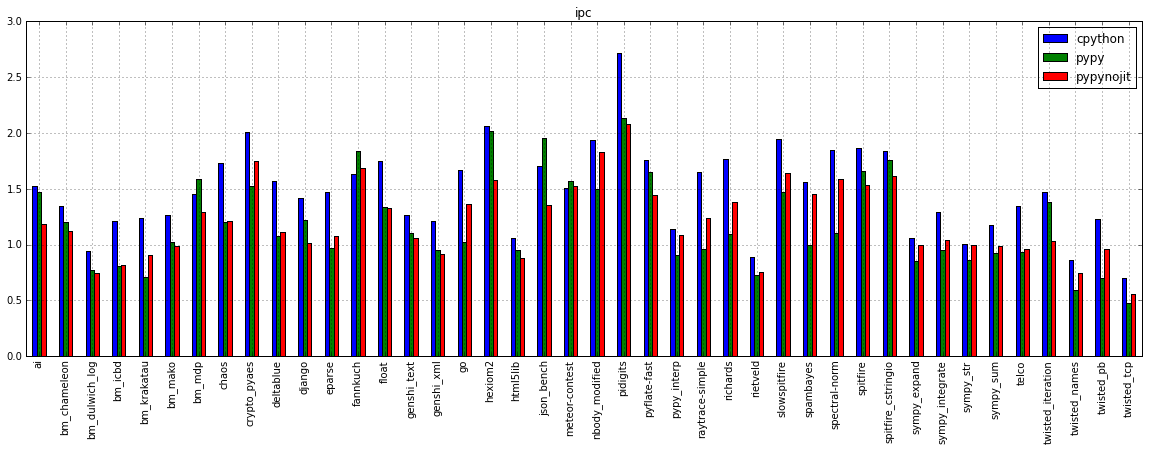

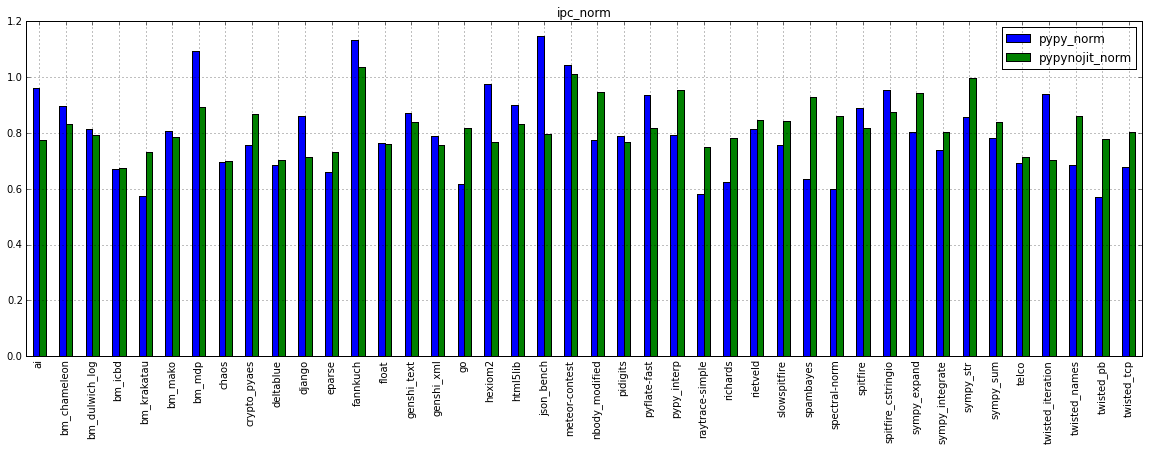

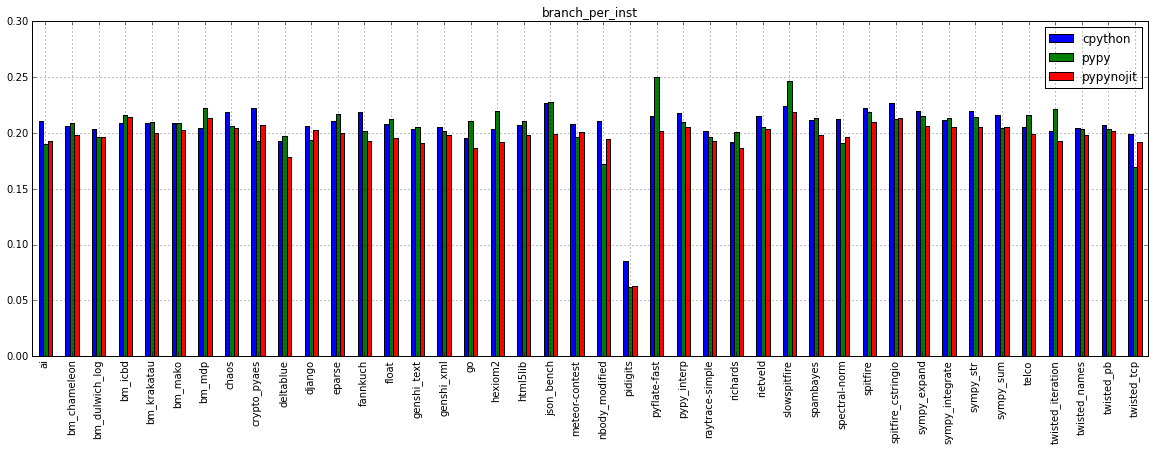

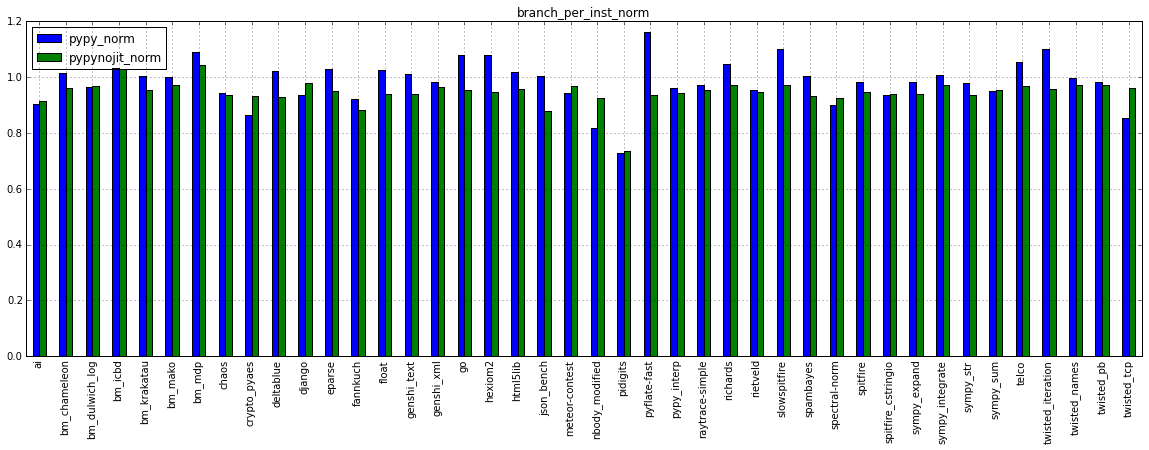

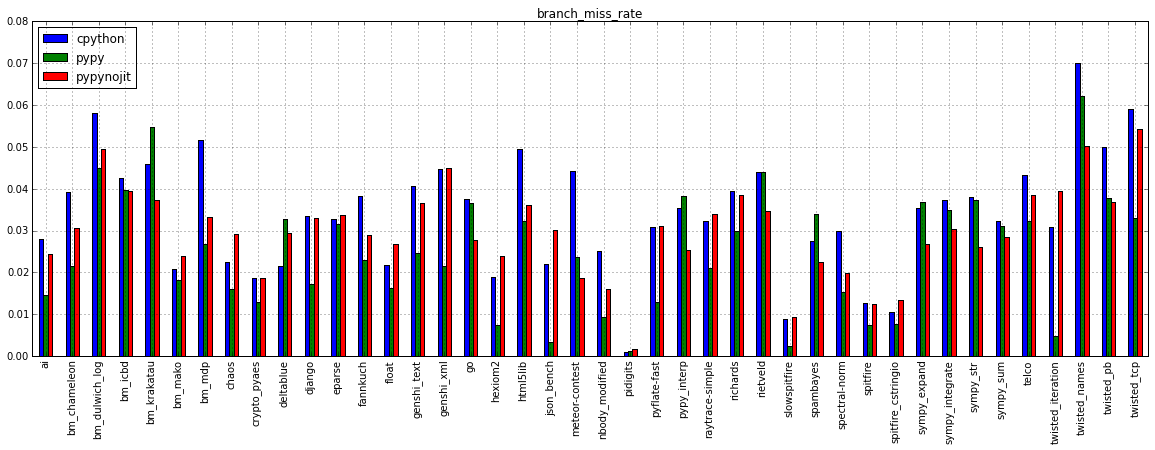

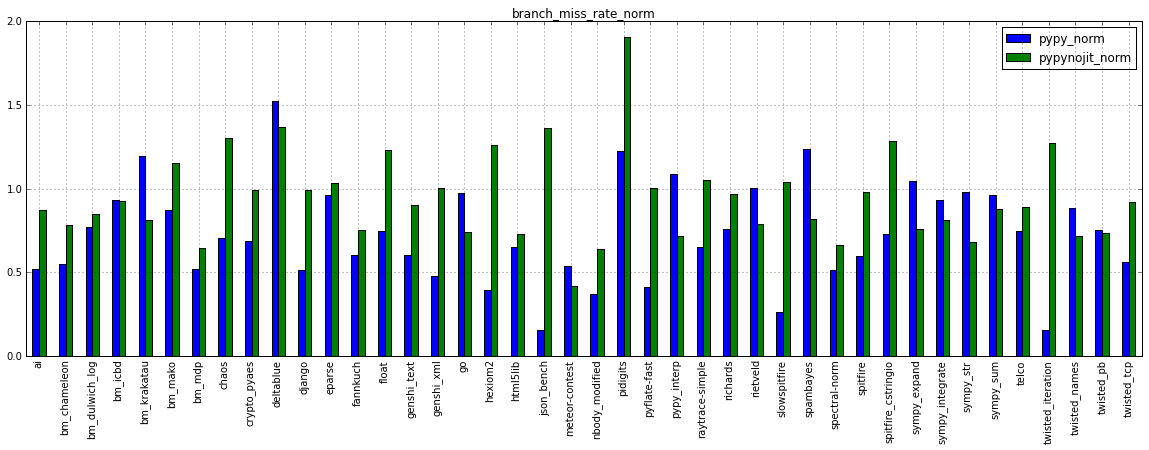

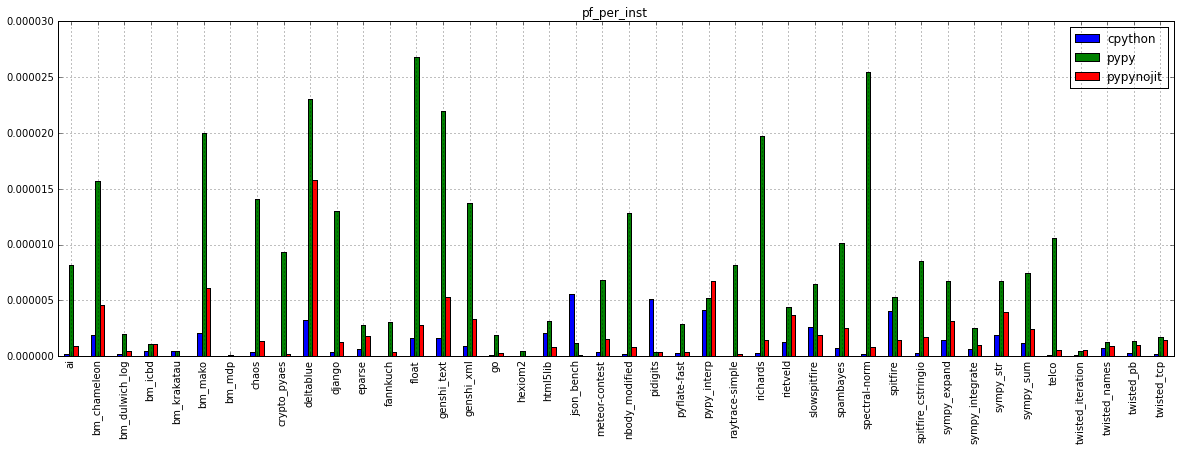

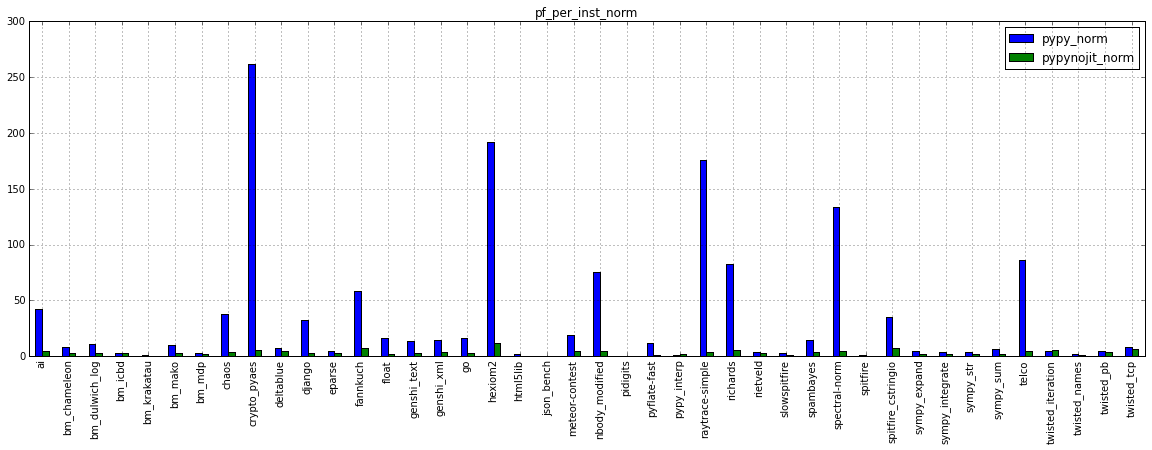

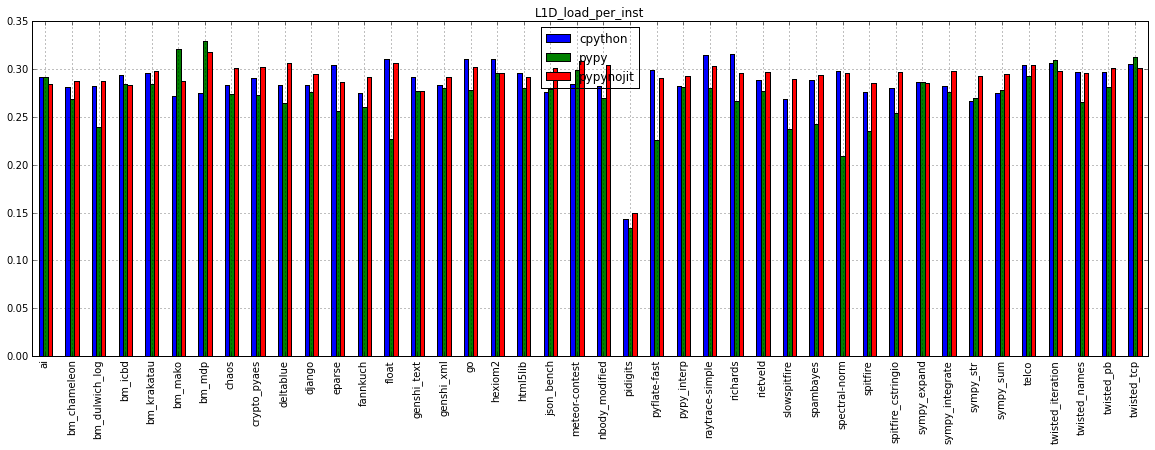

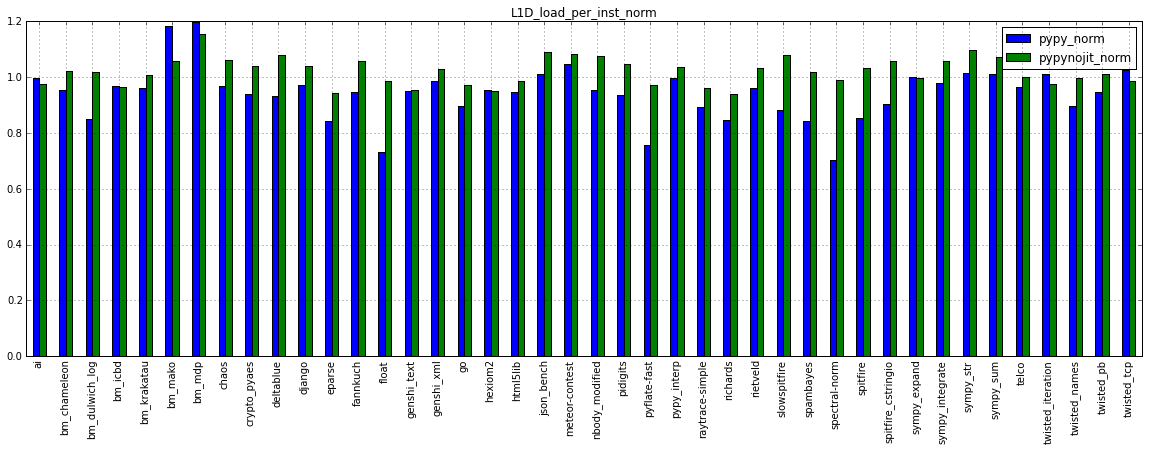

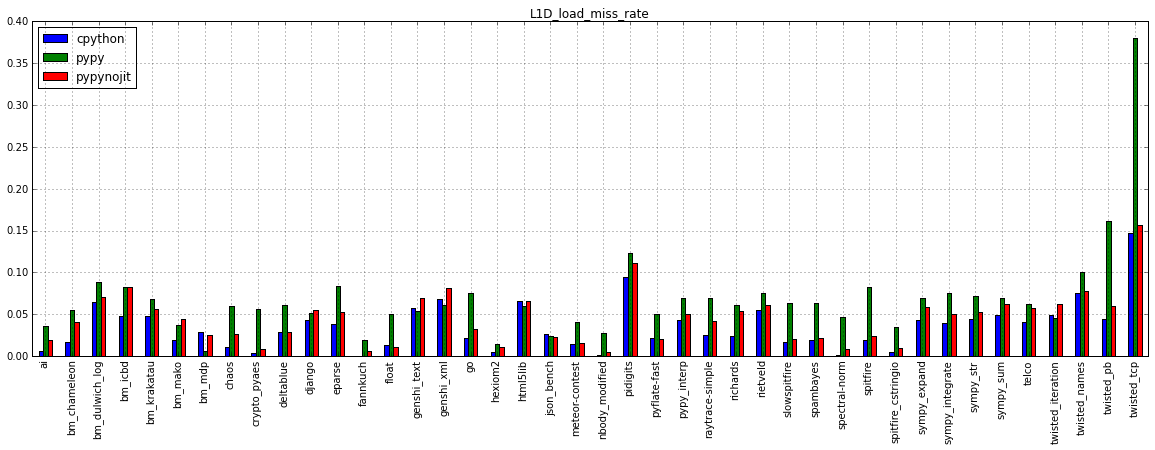

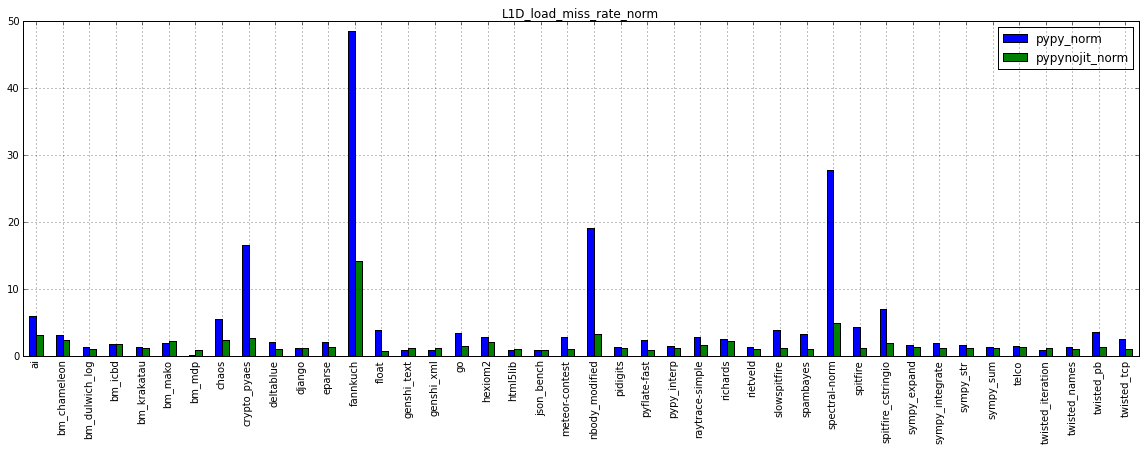

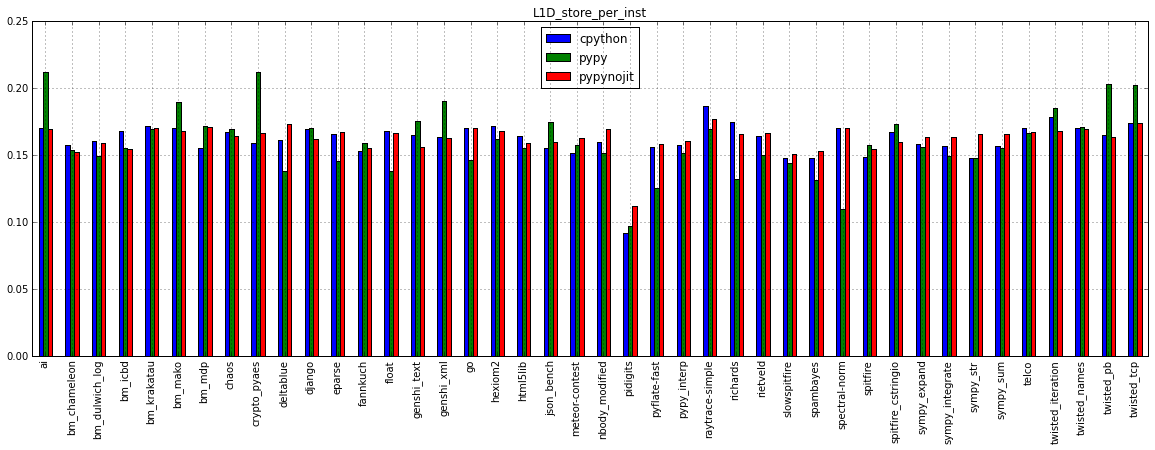

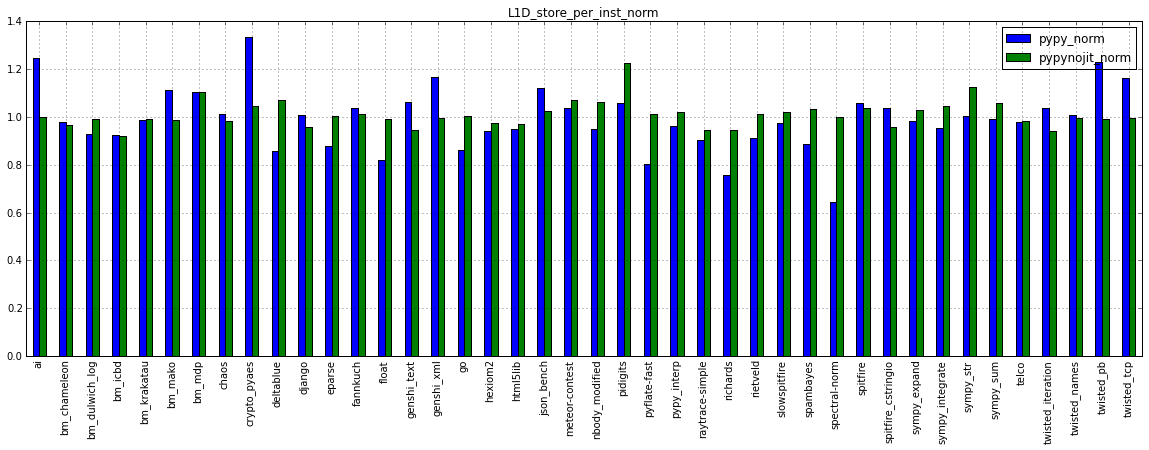

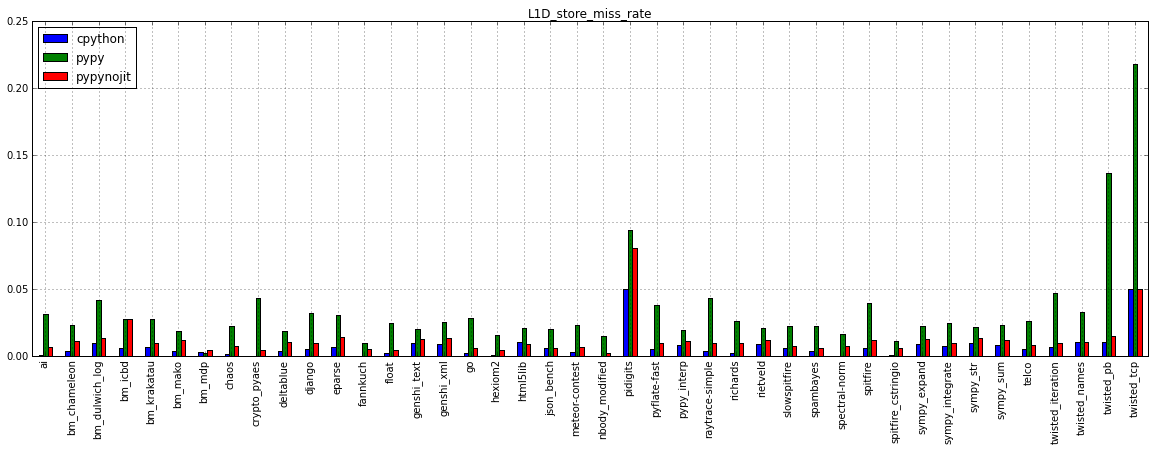

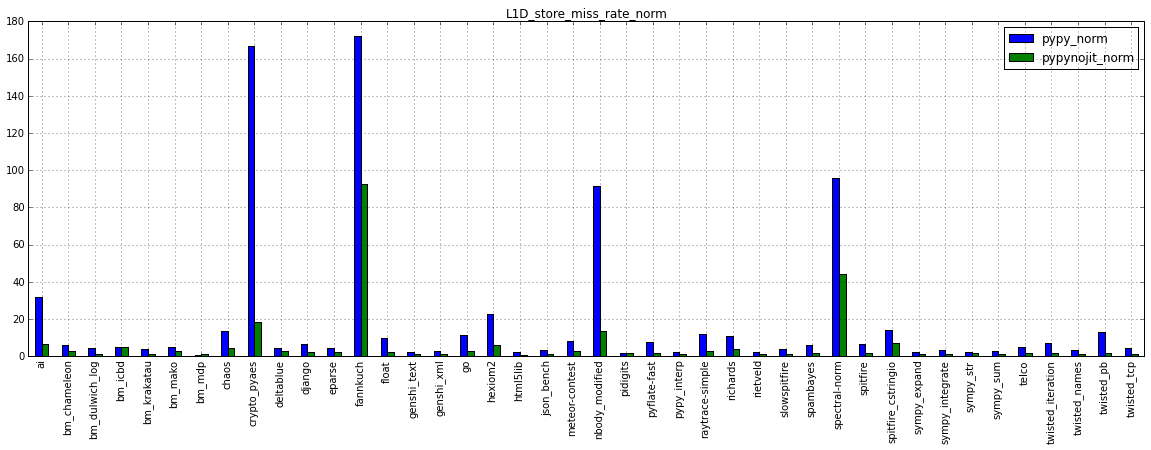

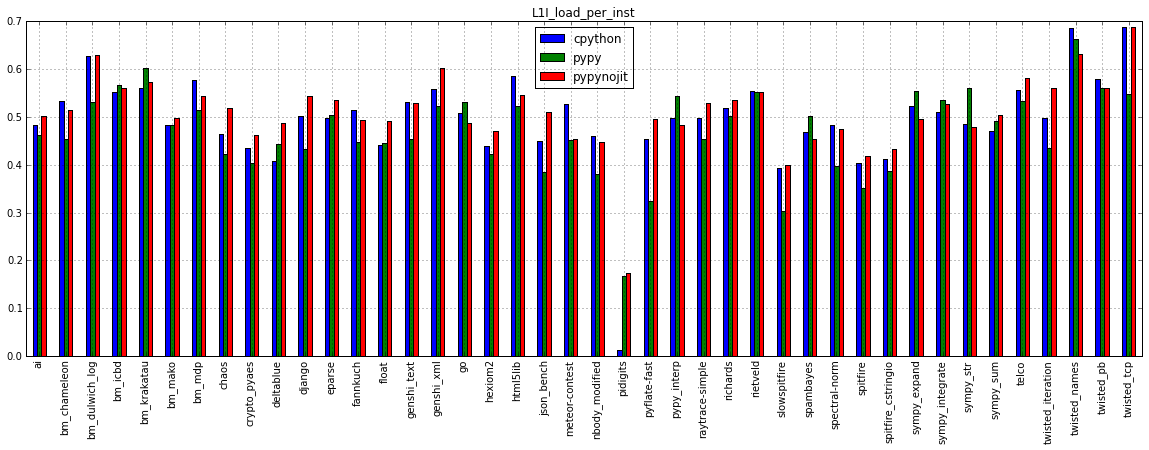

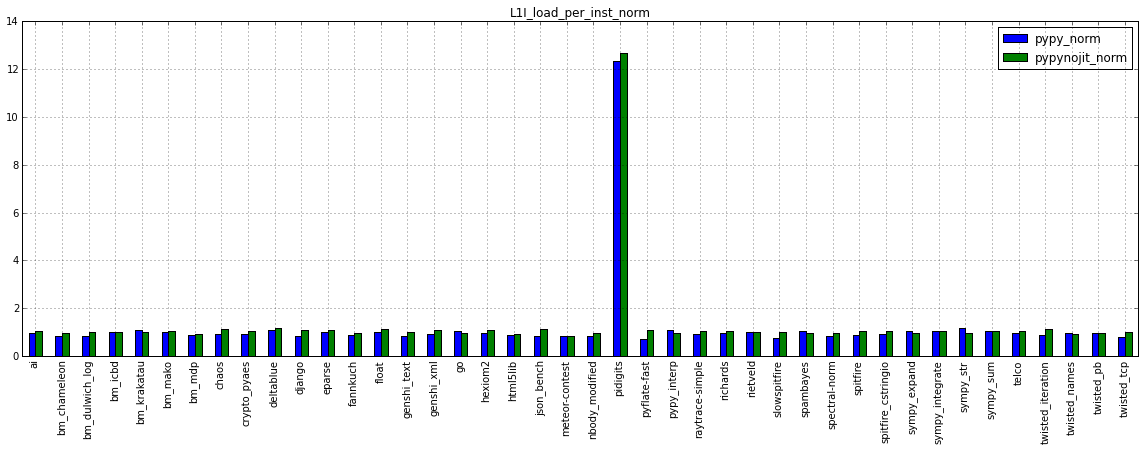

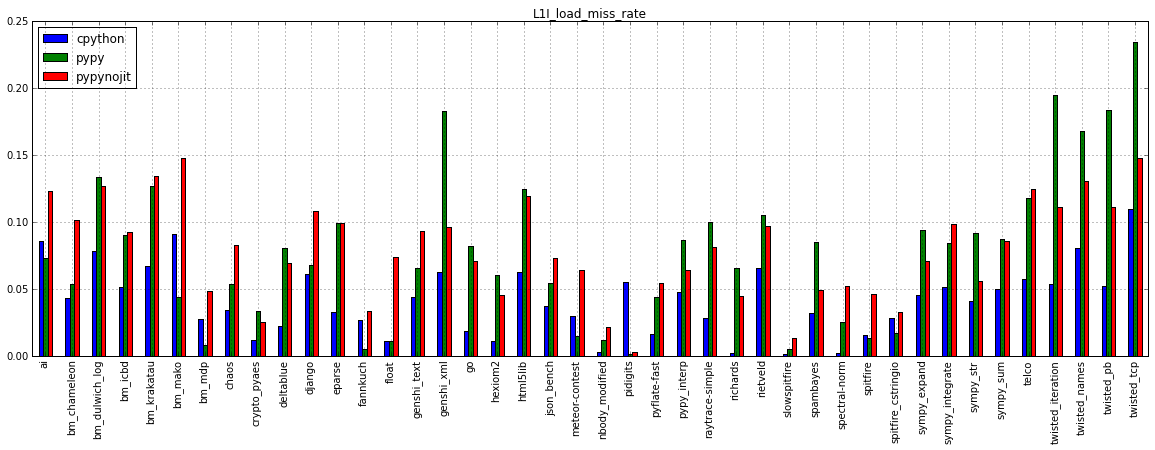

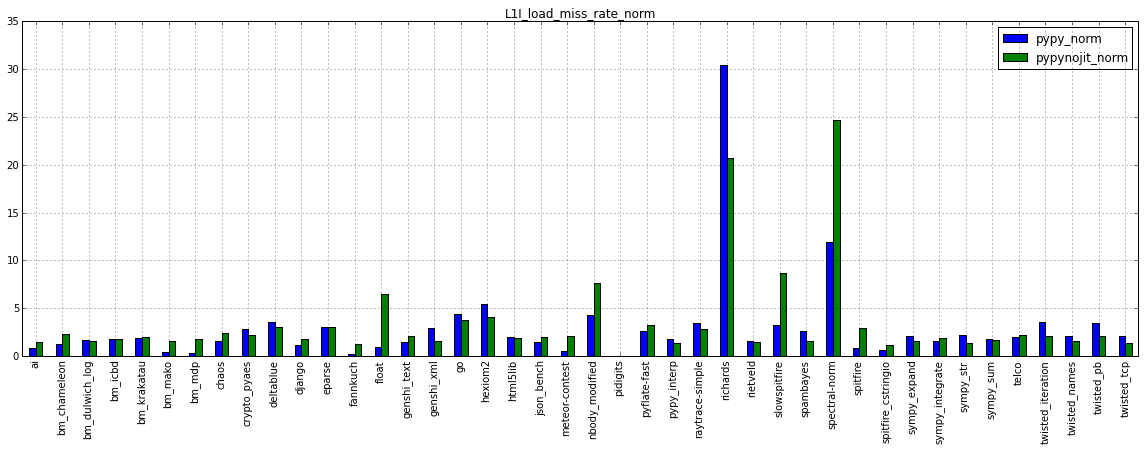

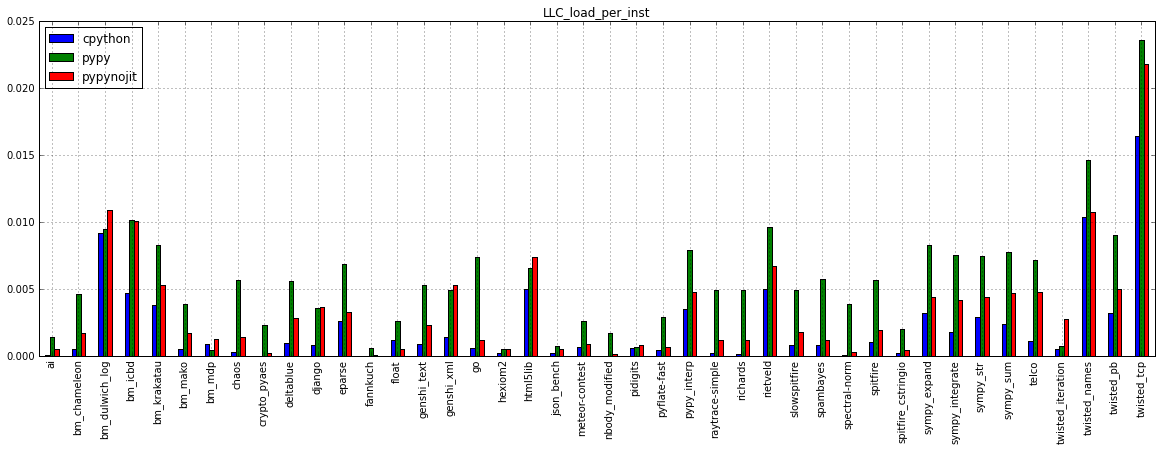

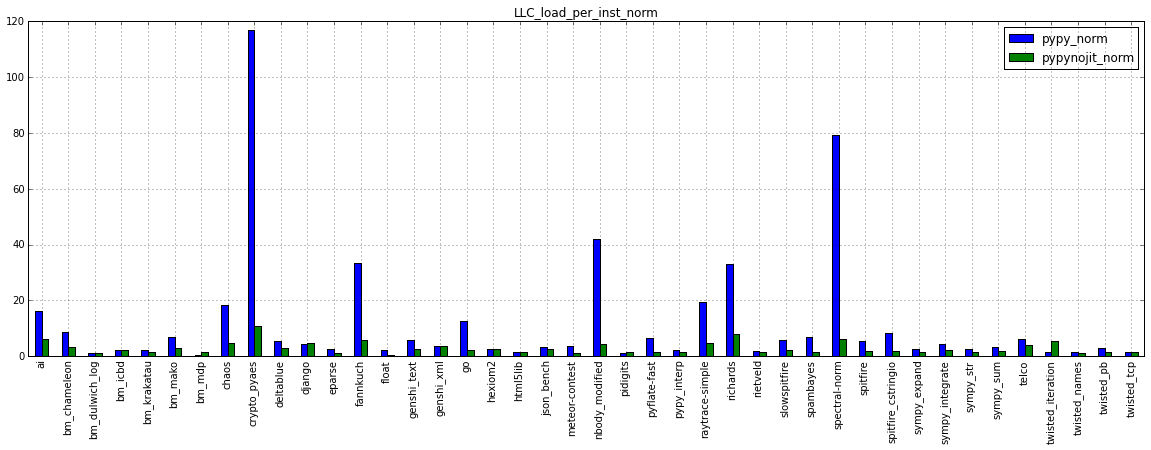

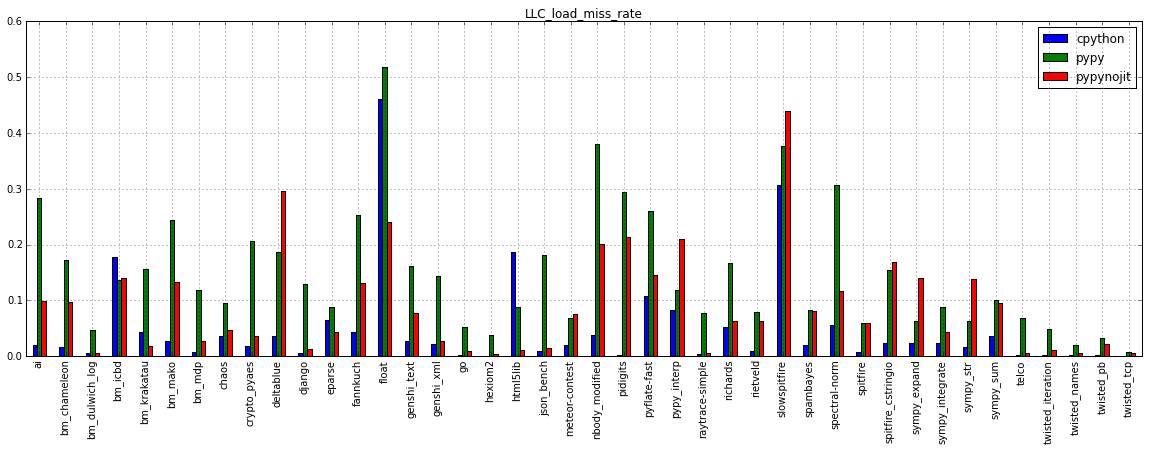

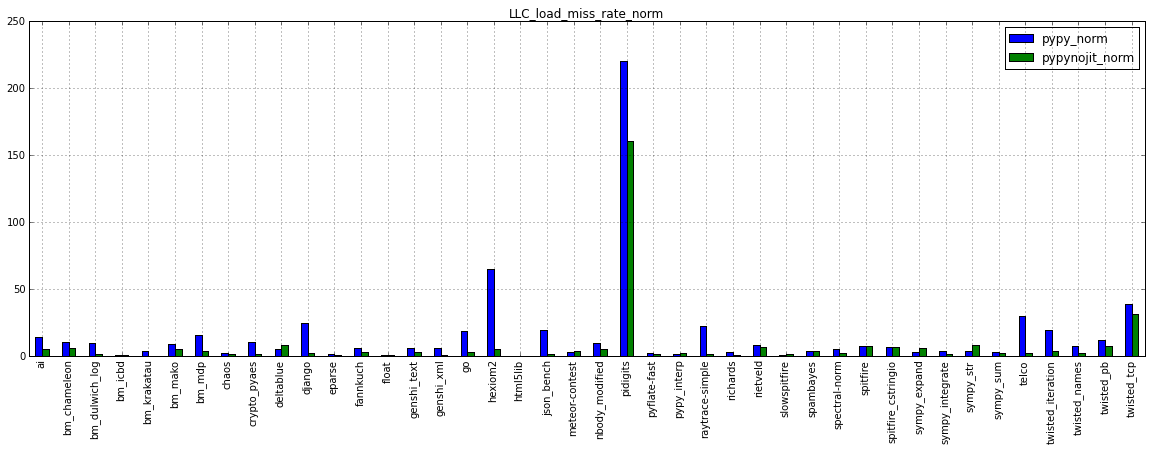

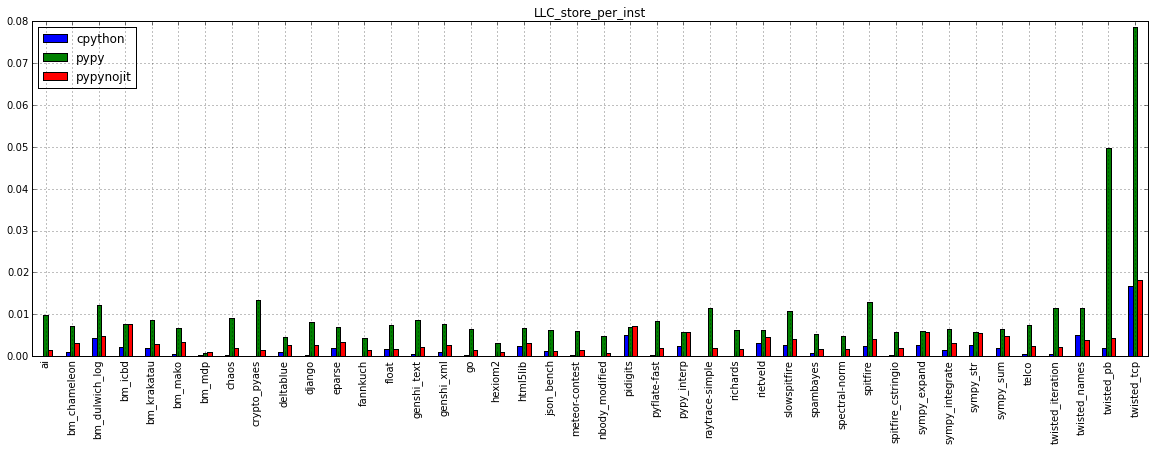

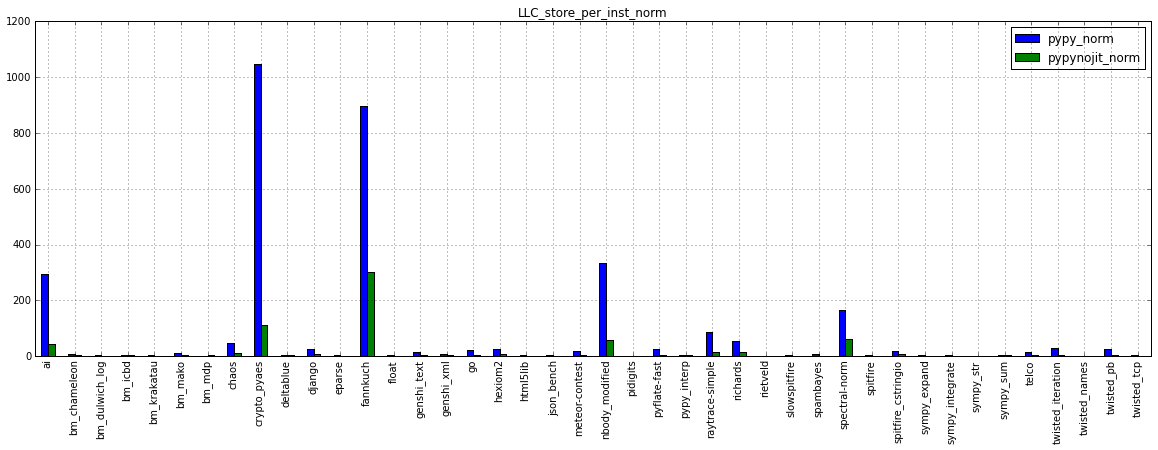

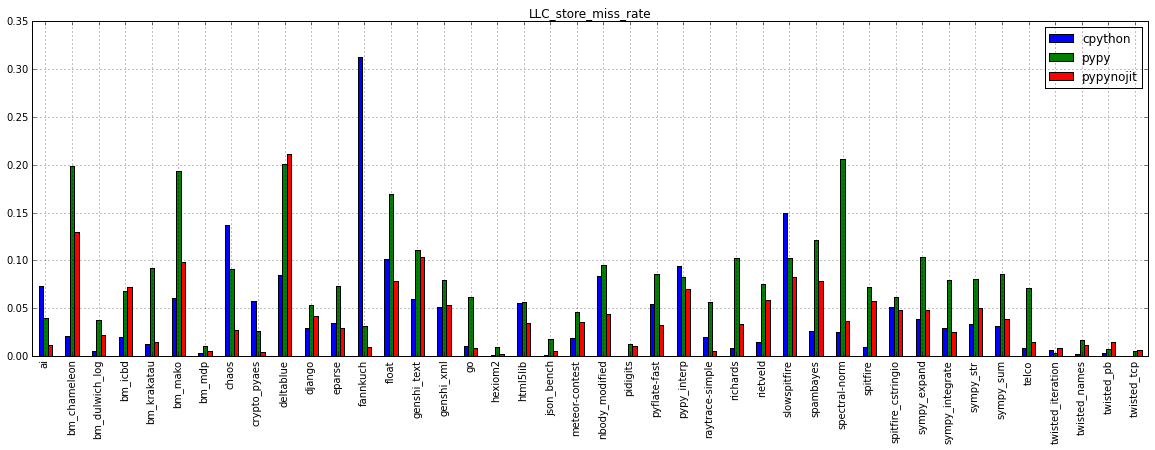

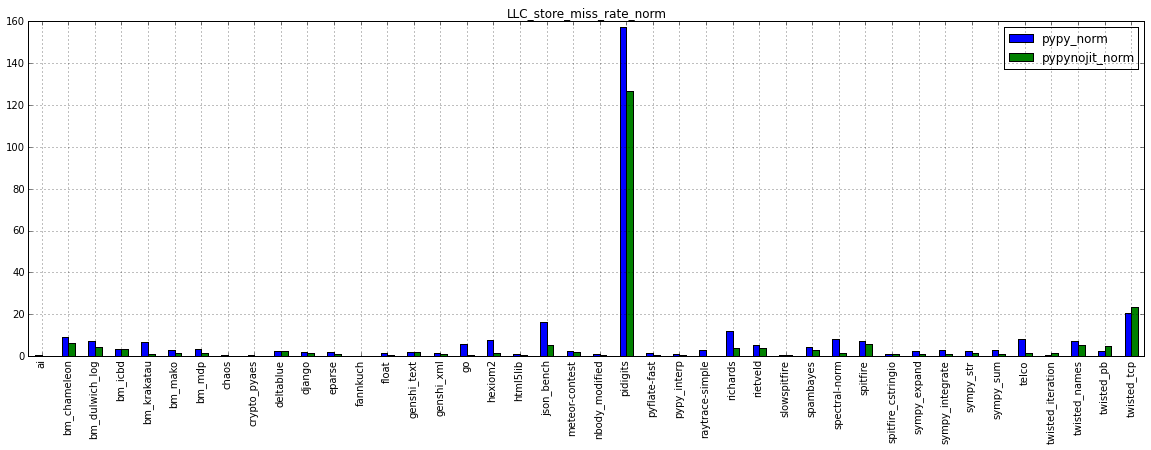

In [155]:
stats = ["ipc", "branch_per_inst", "branch_miss_rate", "pf_per_inst",
         "L1D_load_per_inst", "L1D_load_miss_rate", "L1D_store_per_inst", "L1D_store_miss_rate",
         "L1I_load_per_inst", "L1I_load_miss_rate",
         "LLC_load_per_inst", "LLC_load_miss_rate", "LLC_store_per_inst", "LLC_store_miss_rate",
        ]

for stat in stats:
    plot_py( stat )
    plot_py( stat, norm=True )

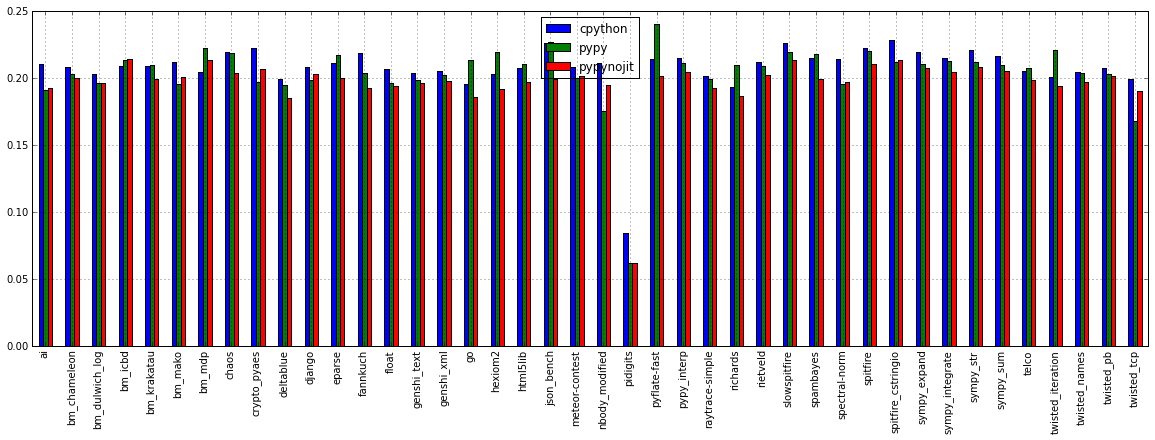

In [115]:
py_df["branch_per_inst"].unstack().plot( kind="bar", figsize=(20,6) )

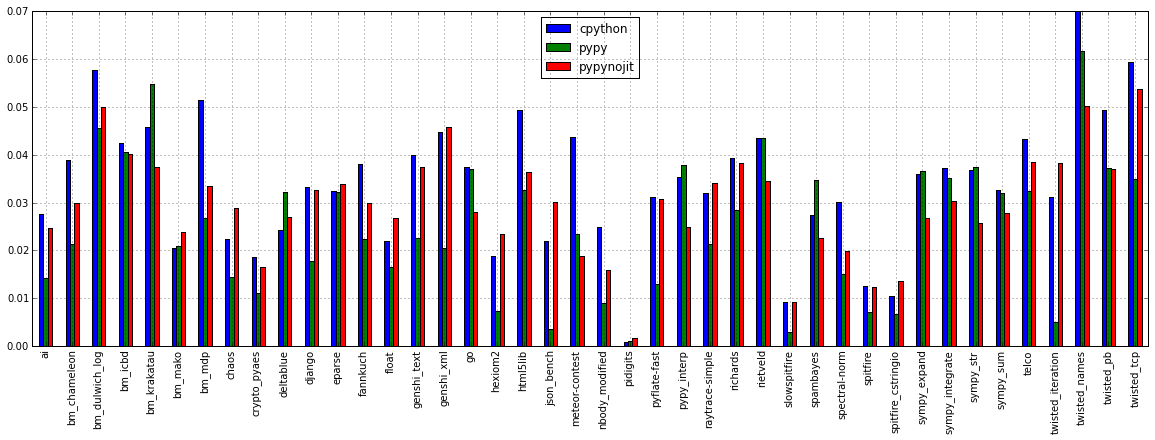

In [116]:
py_df["branch_miss_rate"].unstack().plot( kind="bar", figsize=(20,6) )

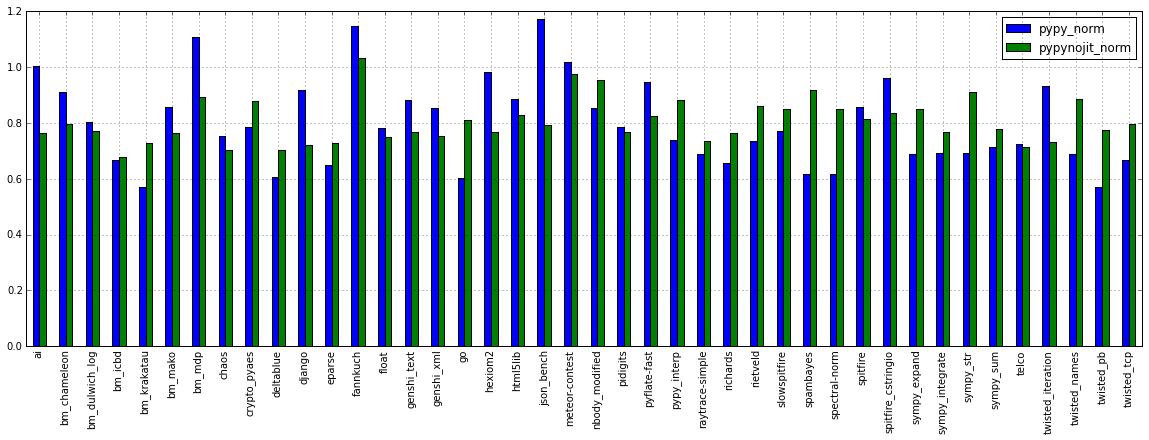

In [129]:
get_norm_df("ipc").plot( kind="bar", figsize=(20,6) )

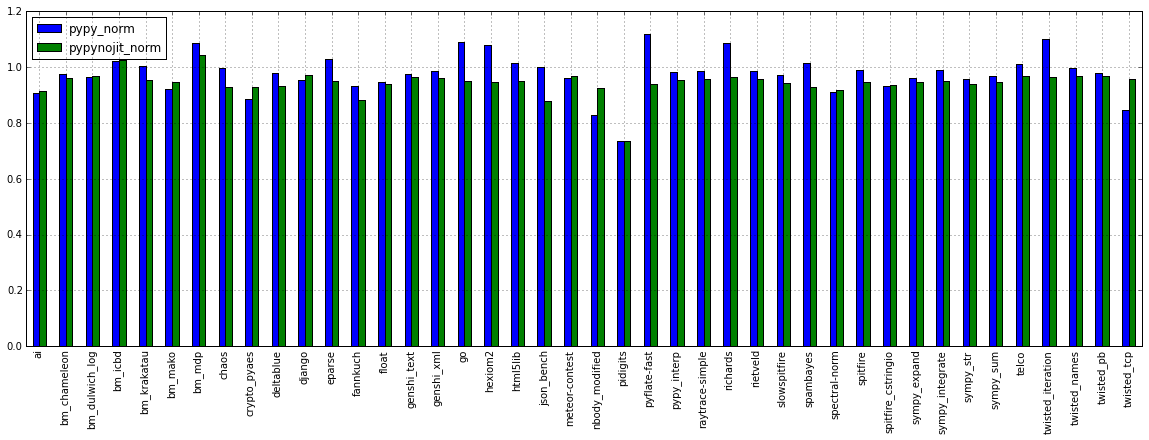

In [130]:
get_norm_df("branch_per_inst").plot( kind="bar", figsize=(20,6) )

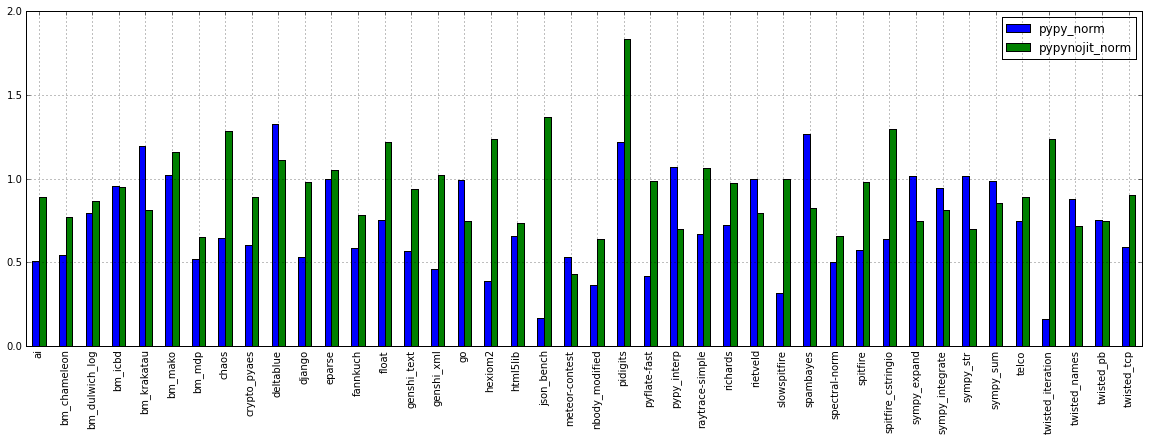

In [131]:
get_norm_df("branch_miss_rate").plot( kind="bar", figsize=(20,6) )

In [128]:
get_norm_df( "ipc" )

,pypy_norm,pypynojit_norm
ai,1.005241,0.763726
bm_chameleon,0.909664,0.797278
bm_dulwich_log,0.803803,0.769951
bm_icbd,0.668814,0.677785
bm_krakatau,0.570434,0.729586
bm_mako,0.857933,0.763814
bm_mdp,1.108922,0.892472
chaos,0.753886,0.703558
crypto_pyaes,0.784036,0.878462
deltablue,0.607069,0.701898


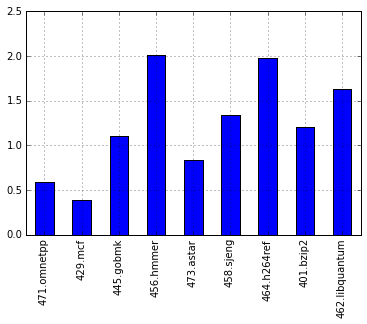

In [133]:
spec_df["ipc"].plot( kind="bar" )

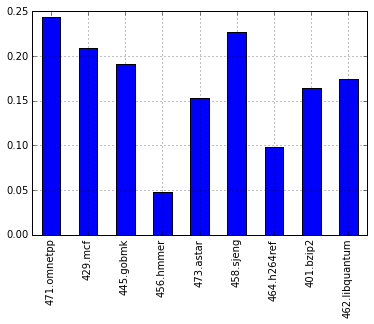

In [134]:
spec_df["branch_per_inst"].plot( kind="bar" )

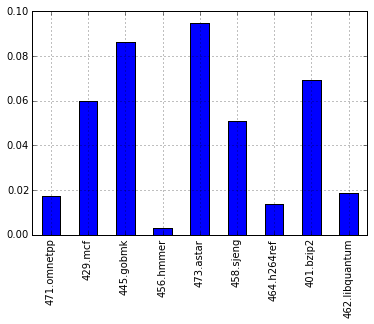

In [135]:
spec_df["branch_miss_rate"].plot( kind="bar" )